In [1]:
import pandas as pd
import numpy as np



In [2]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/e99a526b2e7ccc6c3b70f53db43a87d2/raw/1605fc74aa778066bf2e6695e24d53cf65f2f447/machine-learning-carros-simulacao.csv"
dados = pd.read_csv(uri).drop(columns=["Unnamed: 0"], axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


In [3]:
# situação horrível de "azar" onde as classes estão ordenadas por padrão

dados_azar = dados.sort_values("vendido", ascending=True)
x_azar = dados_azar[["preco", "idade_do_modelo","km_por_ano"]]
y_azar = dados_azar["vendido"]
dados_azar.head()

,preco,vendido,idade_do_modelo,km_por_ano
4999,74023.29,0,12,24812.80412
5322,84843.49,0,13,23095.63834
5319,83100.27,0,19,36240.72746
5316,87932.13,0,16,32249.56426
5315,77937.01,0,15,28414.50704


In [4]:
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier

SEED = 301
np.random.seed(SEED)

modelo = DummyClassifier()
results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com dummy stratified, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com dummy stratified, 10 = [49.79, 53.45]


In [5]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

SEED = 301
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com cross validation, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, 10 = [73.83, 77.73]


In [6]:
# gerando dados elatorios de modelo de carro para simulacao de agrupamento ao usar nosso estimador

np.random.seed(SEED)
dados['modelo'] = dados.idade_do_modelo + np.random.randint(-2, 3, size=10000)
dados.modelo = dados.modelo + abs(dados.modelo.min()) + 1
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano,modelo
0,30941.02,1,18,35085.22134,18
1,40557.96,1,20,12622.05362,24
2,89627.50,0,12,11440.79806,14
3,95276.14,0,3,43167.32682,6
4,117384.68,1,4,12770.11290,5


In [7]:
def imprime_resultados(results):
  media = results['test_score'].mean() * 100
  desvio = results['test_score'].std() * 100
  print("Accuracy médio %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

In [8]:
# GroupKFold para analisar como o modelo se comporta com novos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 75.78
Intervalo [73.67, 77.90]


In [9]:
# GroupKFold em um pipeline com StandardScaler e SVC

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.exceptions import DataConversionWarning
import warnings

warnings.simplefilter(action='ignore', category=DataConversionWarning)


SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
modelo = SVC()

pipeline = Pipeline([('transformacao',scaler), ('estimador',modelo)])

cv = GroupKFold(n_splits = 10)
results = cross_validate(pipeline, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 76.68
Intervalo [74.28, 79.08]


## Árvore com 2 níveis

In [10]:
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 75.78
Intervalo [73.67, 77.90]


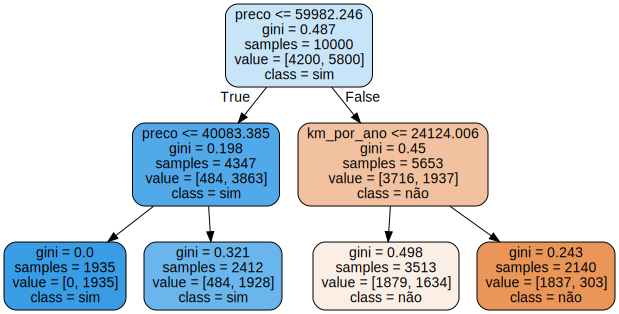

In [11]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(x_azar,y_azar)
features = x_azar.columns
dot_data = export_graphviz(modelo, out_file=None,filled=True,rounded=True,
                   class_names=["não","sim"],
                   feature_names = features)
graph = graphviz.Source(dot_data)
graph

## Árvore com 3 níveis

In [12]:
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=3)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 78.67
Intervalo [76.40, 80.94]


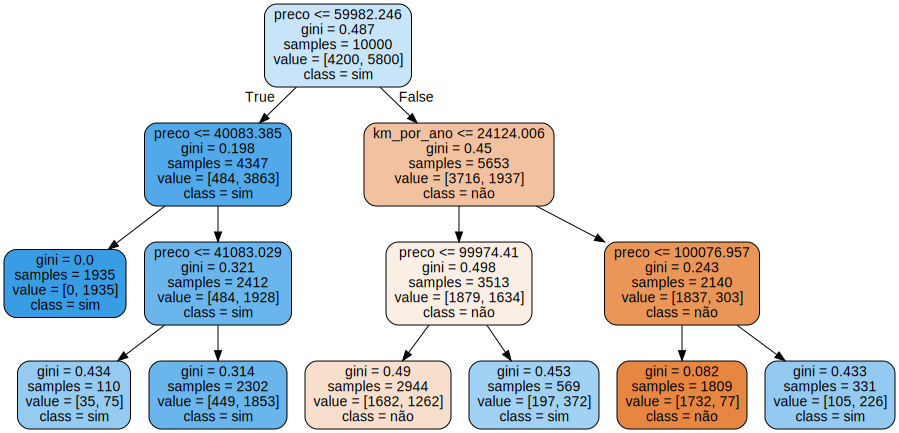

In [13]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(x_azar,y_azar)
features = x_azar.columns
dot_data = export_graphviz(modelo, out_file=None,filled=True,rounded=True,
                   class_names=["não","sim"],
                   feature_names = features)
graph = graphviz.Source(dot_data)
graph

## Árvore com 10 níveis

In [14]:
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=10)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 77.19
Intervalo [75.26, 79.13]


Ficou pior que a de 3 níveis.

## Explorando hiperparâmetros em uma dimensão (max_depth)

In [15]:
def roda_arvore_de_decisao(max_depth):
    SEED = 301
    np.random.seed(SEED)

    cv = GroupKFold(n_splits = 10)
    modelo = DecisionTreeClassifier(max_depth=max_depth)
    results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
    train_score = results['train_score'].mean() * 100
    test_score = results['test_score'].mean() * 100
    print("Árvore max_depth = %d, media de treino = %.2f, media de teste = %.2f" % (max_depth,results['train_score'].mean() * 100, results['test_score'].mean() * 100))
    tabela = [max_depth,train_score,test_score]
    return tabela


resultados = [roda_arvore_de_decisao(i) for i in range(1,33)]
resultados = pd.DataFrame(resultados, columns=["max_depth","train", "test"])

Árvore max_depth = 1, media de treino = 75.79, media de teste = 75.78
Árvore max_depth = 2, media de treino = 75.79, media de teste = 75.78
Árvore max_depth = 3, media de treino = 78.75, media de teste = 78.67
Árvore max_depth = 4, media de treino = 78.79, media de teste = 78.63
Árvore max_depth = 5, media de treino = 78.94, media de teste = 78.56
Árvore max_depth = 6, media de treino = 79.17, media de teste = 78.12
Árvore max_depth = 7, media de treino = 79.50, media de teste = 77.96
Árvore max_depth = 8, media de treino = 79.89, media de teste = 77.86
Árvore max_depth = 9, media de treino = 80.46, media de teste = 77.38
Árvore max_depth = 10, media de treino = 81.16, media de teste = 77.19
Árvore max_depth = 11, media de treino = 82.03, media de teste = 76.97
Árvore max_depth = 12, media de treino = 82.89, media de teste = 76.49
Árvore max_depth = 13, media de treino = 83.95, media de teste = 75.81
Árvore max_depth = 14, media de treino = 85.03, media de teste = 75.66
Árvore max_dept

In [16]:
resultados.head()

,max_depth,train,test
0,1,75.791169,75.784219
1,2,75.791169,75.784219
2,3,78.750993,78.672633
3,4,78.787628,78.632803
4,5,78.941007,78.555912


## Overfit: ficou "perfeito" para o treino e ruim para o teste.

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x = "max_depth", y = "train", data = resultados)
sns.lineplot(x = "max_depth", y = "test", data = resultados)
plt.legend(["Treino","Teste"])

In [18]:
resultados.sort_values("test", ascending=False).head()

,max_depth,train,test
2,3,78.750993,78.672633
3,4,78.787628,78.632803
4,5,78.941007,78.555912
5,6,79.170115,78.123266
6,7,79.496806,77.963185


## Explorando hiperparâmetros em duas dimensões (max_depth e min_samples_leaf)

In [19]:
def roda_arvore_de_decisao(max_depth,min_samples_leaf):
    SEED = 301
    np.random.seed(SEED)

    cv = GroupKFold(n_splits = 10)
    modelo = DecisionTreeClassifier(max_depth=max_depth,min_samples_leaf=min_samples_leaf)
    results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
    train_score = results['train_score'].mean() * 100
    test_score = results['test_score'].mean() * 100
    print("Árvore max_depth = %d, min_samples_leaf = %d, media de treino = %.2f, media de teste = %.2f" % (max_depth,min_samples_leaf,results['train_score'].mean() * 100, results['test_score'].mean() * 100))
    tabela = [max_depth,min_samples_leaf,train_score,test_score]
    return tabela

def busca():
    resultados = []
    for max_depth in range(1,33):
        for mins_samples_leaf in [32, 64, 128, 256]:
            tabela = roda_arvore_de_decisao(max_depth,mins_samples_leaf)
            resultados.append(tabela)
    resultados = pd.DataFrame(resultados, columns=["max_depth","min_samples_leaf","train", "test"])
    return resultados

resultados = busca()
resultados.head()

Árvore max_depth = 1, min_samples_leaf = 32, media de treino = 75.79, media de teste = 75.78
Árvore max_depth = 1, min_samples_leaf = 64, media de treino = 75.79, media de teste = 75.78
Árvore max_depth = 1, min_samples_leaf = 128, media de treino = 75.79, media de teste = 75.78
Árvore max_depth = 1, min_samples_leaf = 256, media de treino = 75.79, media de teste = 75.78
Árvore max_depth = 2, min_samples_leaf = 32, media de treino = 75.79, media de teste = 75.78
Árvore max_depth = 2, min_samples_leaf = 64, media de treino = 75.79, media de teste = 75.78
Árvore max_depth = 2, min_samples_leaf = 128, media de treino = 75.79, media de teste = 75.78
Árvore max_depth = 2, min_samples_leaf = 256, media de treino = 75.79, media de teste = 75.78
Árvore max_depth = 3, min_samples_leaf = 32, media de treino = 78.75, media de teste = 78.67
Árvore max_depth = 3, min_samples_leaf = 64, media de treino = 78.75, media de teste = 78.67
Árvore max_depth = 3, min_samples_leaf = 128, media de treino = 78

Árvore max_depth = 23, min_samples_leaf = 32, media de treino = 80.88, media de teste = 76.87
Árvore max_depth = 23, min_samples_leaf = 64, media de treino = 79.79, media de teste = 77.30
Árvore max_depth = 23, min_samples_leaf = 128, media de treino = 79.21, media de teste = 78.22
Árvore max_depth = 23, min_samples_leaf = 256, media de treino = 78.90, media de teste = 77.85
Árvore max_depth = 24, min_samples_leaf = 32, media de treino = 80.89, media de teste = 76.84
Árvore max_depth = 24, min_samples_leaf = 64, media de treino = 79.79, media de teste = 77.30
Árvore max_depth = 24, min_samples_leaf = 128, media de treino = 79.21, media de teste = 78.22
Árvore max_depth = 24, min_samples_leaf = 256, media de treino = 78.90, media de teste = 77.85
Árvore max_depth = 25, min_samples_leaf = 32, media de treino = 80.89, media de teste = 76.84
Árvore max_depth = 25, min_samples_leaf = 64, media de treino = 79.79, media de teste = 77.30
Árvore max_depth = 25, min_samples_leaf = 128, media de 

,max_depth,min_samples_leaf,train,test
0,1,32,75.791169,75.784219
1,1,64,75.791169,75.784219
2,1,128,75.791169,75.784219
3,1,256,75.791169,75.784219
4,2,32,75.791169,75.784219


In [20]:
resultados.sort_values("test", ascending=False).head()

,max_depth,min_samples_leaf,train,test
15,4,256,78.750993,78.672633
12,4,32,78.750993,78.672633
14,4,128,78.750993,78.672633
13,4,64,78.750993,78.672633
8,3,32,78.750993,78.672633


In [21]:
corr = resultados.corr()

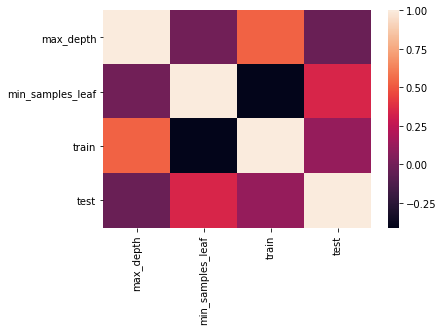

In [22]:
sns.heatmap(corr)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F41D9B1FD0>,
      dtype=object)

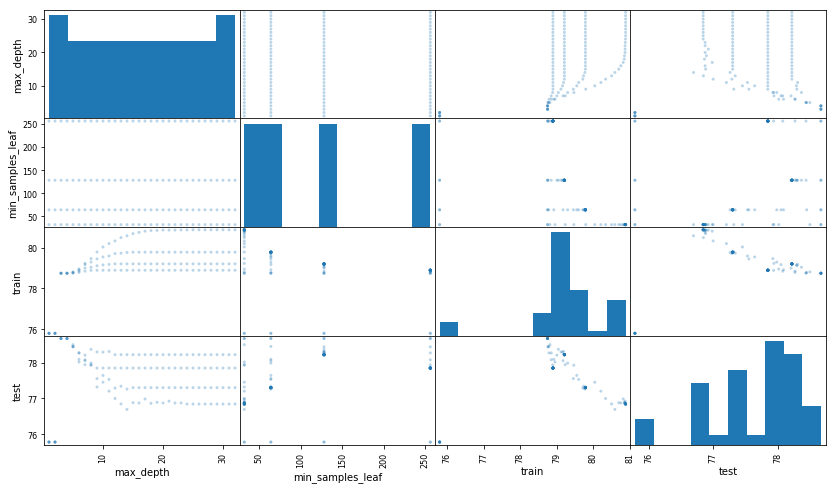

In [23]:
pd.plotting.scatter_matrix(resultados, figsize=(14,8), alpha = 0.3)

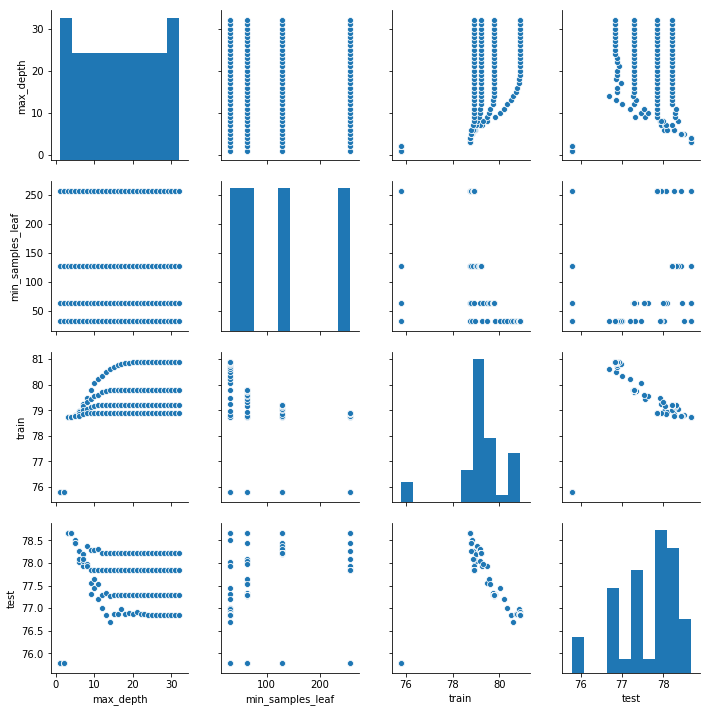

In [24]:
sns.pairplot(resultados)

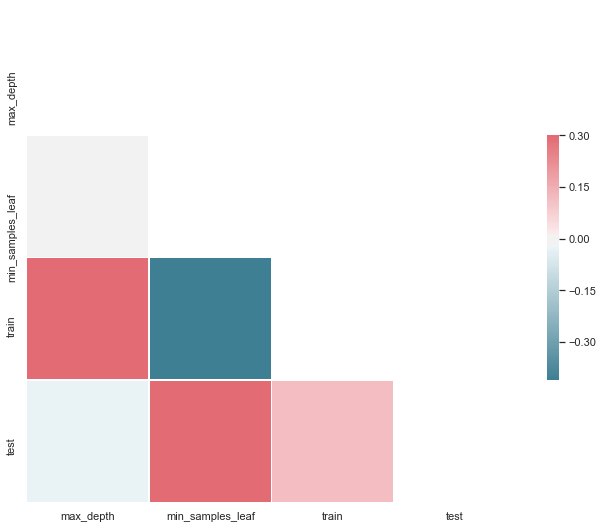

In [25]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [26]:
def busca():
    resultados = []
    for max_depth in range(1,33):
        for mins_samples_leaf in [128,192,256,512]:
            tabela = roda_arvore_de_decisao(max_depth,mins_samples_leaf)
            resultados.append(tabela)
    resultados = pd.DataFrame(resultados, columns=["max_depth","min_samples_leaf","train", "test"])
    return resultados

resultados = busca()
resultados.head()

Árvore max_depth = 1, min_samples_leaf = 128, media de treino = 75.79, media de teste = 75.78
Árvore max_depth = 1, min_samples_leaf = 192, media de treino = 75.79, media de teste = 75.78
Árvore max_depth = 1, min_samples_leaf = 256, media de treino = 75.79, media de teste = 75.78
Árvore max_depth = 1, min_samples_leaf = 512, media de treino = 75.79, media de teste = 75.78
Árvore max_depth = 2, min_samples_leaf = 128, media de treino = 75.79, media de teste = 75.78
Árvore max_depth = 2, min_samples_leaf = 192, media de treino = 75.79, media de teste = 75.78
Árvore max_depth = 2, min_samples_leaf = 256, media de treino = 75.79, media de teste = 75.78
Árvore max_depth = 2, min_samples_leaf = 512, media de treino = 75.79, media de teste = 75.78
Árvore max_depth = 3, min_samples_leaf = 128, media de treino = 78.75, media de teste = 78.67
Árvore max_depth = 3, min_samples_leaf = 192, media de treino = 78.75, media de teste = 78.67
Árvore max_depth = 3, min_samples_leaf = 256, media de trein

Árvore max_depth = 23, min_samples_leaf = 128, media de treino = 79.21, media de teste = 78.22
Árvore max_depth = 23, min_samples_leaf = 192, media de treino = 79.01, media de teste = 78.05
Árvore max_depth = 23, min_samples_leaf = 256, media de treino = 78.90, media de teste = 77.85
Árvore max_depth = 23, min_samples_leaf = 512, media de treino = 77.53, media de teste = 77.50
Árvore max_depth = 24, min_samples_leaf = 128, media de treino = 79.21, media de teste = 78.22
Árvore max_depth = 24, min_samples_leaf = 192, media de treino = 79.01, media de teste = 78.05
Árvore max_depth = 24, min_samples_leaf = 256, media de treino = 78.90, media de teste = 77.85
Árvore max_depth = 24, min_samples_leaf = 512, media de treino = 77.53, media de teste = 77.50
Árvore max_depth = 25, min_samples_leaf = 128, media de treino = 79.21, media de teste = 78.22
Árvore max_depth = 25, min_samples_leaf = 192, media de treino = 79.01, media de teste = 78.05
Árvore max_depth = 25, min_samples_leaf = 256, med

,max_depth,min_samples_leaf,train,test
0,1,128,75.791169,75.784219
1,1,192,75.791169,75.784219
2,1,256,75.791169,75.784219
3,1,512,75.791169,75.784219
4,2,128,75.791169,75.784219


In [27]:
corr = resultados.corr()

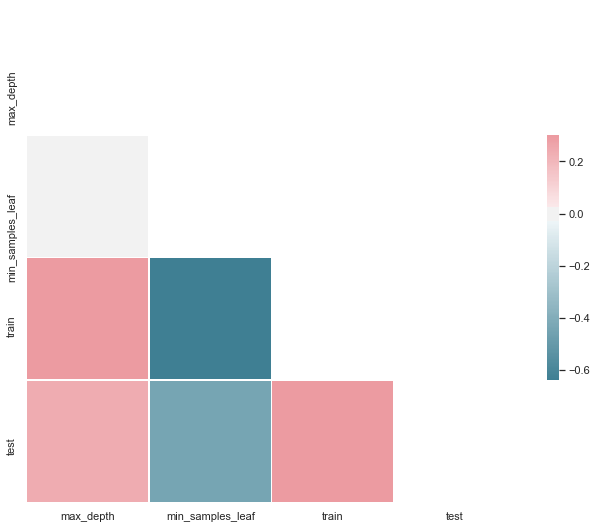

In [28]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [29]:
resultados.sort_values("test",ascending=False).head()

,max_depth,min_samples_leaf,train,test
13,4,192,78.750993,78.672633
8,3,128,78.750993,78.672633
9,3,192,78.750993,78.672633
10,3,256,78.750993,78.672633
14,4,256,78.750993,78.672633


# Explorando 3 dimensões de hiperparâmetros

In [30]:
def roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf = min_samples_leaf, min_samples_split = min_samples_split)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100

  tabela = [max_depth, min_samples_leaf, min_samples_split, train_score, test_score]
  return tabela

In [31]:
def busca():
  resultados = []
  for max_depth in range(1,33):
    for min_samples_leaf in [32, 64, 128, 256]:
        for min_samples_split in [32, 64, 128, 256]:
          tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split)
          resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns= ["max_depth","min_samples_leaf", "min_samples_split", "train","test"])
  return resultados

In [32]:
resultados = busca()
resultados.head()

,max_depth,min_samples_leaf,min_samples_split,train,test
0,1,32,32,75.791169,75.784219
1,1,32,64,75.791169,75.784219
2,1,32,128,75.791169,75.784219
3,1,32,256,75.791169,75.784219
4,1,64,32,75.791169,75.784219


In [33]:
corr = resultados.corr()

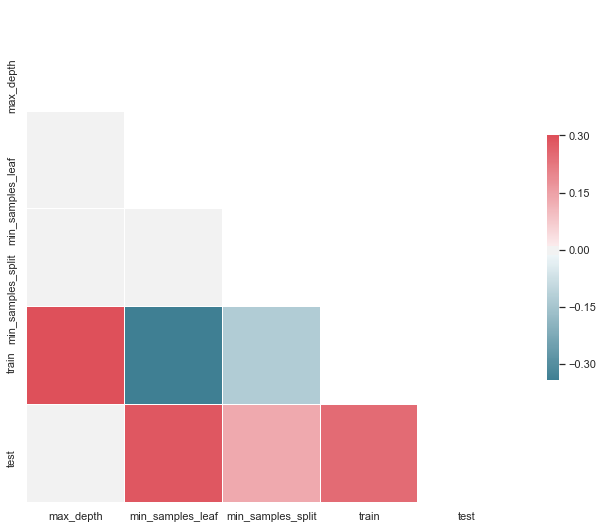

In [34]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [35]:
resultados.sort_values("test",ascending=False).head()

,max_depth,min_samples_leaf,min_samples_split,train,test
63,4,256,256,78.750993,78.672633
48,4,32,32,78.750993,78.672633
34,3,32,128,78.750993,78.672633
35,3,32,256,78.750993,78.672633
36,3,64,32,78.750993,78.672633


In [36]:
def roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf = min_samples_leaf, min_samples_split = min_samples_split)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  fit_time = results['fit_time'].mean()
  score_time = results['score_time'].mean()
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100

  tabela = [max_depth, min_samples_leaf, min_samples_split, train_score, test_score, fit_time, score_time]
  return tabela

def busca():
  resultados = []
  for max_depth in range(1,33):
    for min_samples_leaf in [32, 64, 128, 256]:
        for min_samples_split in [32, 64, 128, 256]:
          tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split)
          resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns= ["max_depth","min_samples_leaf", "min_samples_split", "train","test", "fit_time", "score_time"])
  return resultados

resultados = busca()
resultados.head()

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
0,1,32,32,75.791169,75.784219,0.004347,0.000900
1,1,32,64,75.791169,75.784219,0.004299,0.001200
2,1,32,128,75.791169,75.784219,0.004303,0.001099
3,1,32,256,75.791169,75.784219,0.004499,0.001000
4,1,64,32,75.791169,75.784219,0.004703,0.001199


In [37]:
corr = resultados.corr()

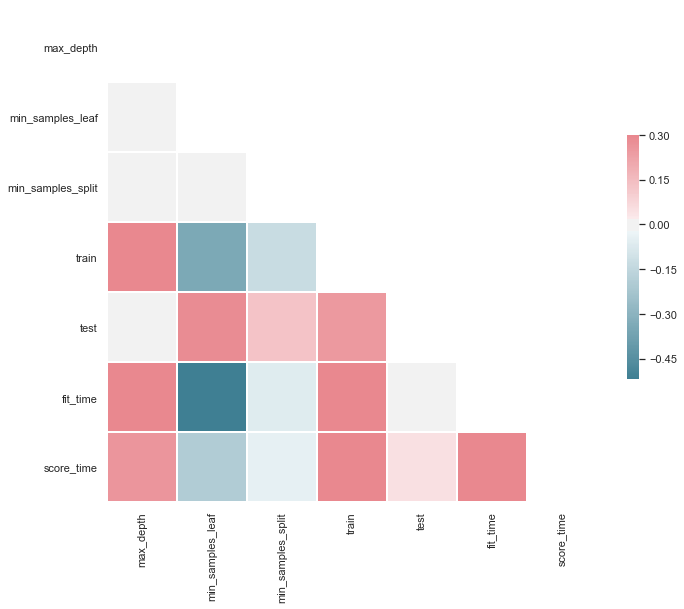

In [38]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [39]:
resultados.sort_values("test",ascending=False).head()

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
63,4,256,256,78.750993,78.672633,0.009712,0.001201
48,4,32,32,78.750993,78.672633,0.009799,0.001399
34,3,32,128,78.750993,78.672633,0.008001,0.001198
35,3,32,256,78.750993,78.672633,0.007797,0.001201
36,3,64,32,78.750993,78.672633,0.008295,0.001000


# Explorando espaço de hiperparâmetros com GridSearchCV

In [40]:
from sklearn.model_selection import GridSearchCV

SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth":[3,5],
    "min_samples_split":[32,64,128],
    "min_samples_leaf":[32,64,128],
    "criterion":["gini","entropy"]    
}

busca = GridSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros,
                    cv = GroupKFold(n_splits=10))
busca.fit(x_azar,y_azar,groups = dados["modelo"])
resultados = pd.DataFrame(busca.cv_results_)
resultados

D:\Anaconda3\envs\aluraenv\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\envs\aluraenv\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\envs\aluraenv\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\envs\aluraenv\lib\site-packages\skle

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.008498,0.000499,0.001400,0.000658,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.786863,0.787882,0.787862,0.786349,0.790210,0.788124,0.788803,0.786834,0.787510,0.001303
1,0.008721,0.000890,0.001394,0.000489,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.786863,0.787882,0.787862,0.786349,0.790210,0.788124,0.788803,0.786834,0.787510,0.001303
2,0.007896,0.000545,0.000999,0.000004,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.786863,0.787882,0.787862,0.786349,0.790210,0.788124,0.788803,0.786834,0.787510,0.001303
3,0.007900,0.000297,0.000899,0.000300,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.786863,0.787882,0.787862,0.786349,0.790210,0.788124,0.788803,0.786834,0.787510,0.001303
4,0.008448,0.000961,0.001602,0.000494,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.786863,0.787882,0.787862,0.786349,0.790210,0.788124,0.788803,0.786834,0.787510,0.001303
5,0.009095,0.000698,0.001321,0.000490,gini,3,64,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.786863,0.787882,0.787862,0.786349,0.790210,0.788124,0.788803,0.786834,0.787510,0.001303
6,0.008094,0.000296,0.001099,0.000301,gini,3,128,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.786863,0.787882,0.787862,0.786349,0.790210,0.788124,0.788803,0.786834,0.787510,0.001303
7,0.008397,0.000665,0.001403,0.000496,gini,3,128,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.786863,0.787882,0.787862,0.786349,0.790210,0.788124,0.788803,0.786834,0.787510,0.001303
8,0.008604,0.001201,0.001300,0.000462,gini,3,128,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.786863,0.787882,0.787862,0.786349,0.790210,0.788124,0.788803,0.786834,0.787510,0.001303
9,0.011422,0.000760,0.001596,0.000504,gini,5,32,32,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.804757,...,0.786863,0.788883,0.789304,0.786349,0.791542,0.788679,0.788803,0.788065,0.788166,0.001642


In [41]:
print(busca.best_params_)
print(busca.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 32, 'min_samples_split': 32}
0.7868


In [42]:
melhor = busca.best_estimator_
melhor

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=32, min_samples_split=32,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Evitar a aboradagem abaixo, pois estará sendo muito otimista. Ver documentação do cross validation.
https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html#sphx-glr-auto-examples-model-selection-plot-nested-cross-validation-iris-py

In [43]:
from sklearn.metrics import accuracy_score
predicoes = melhor.predict(x_azar)
accuracy = accuracy_score(predicoes, y_azar) * 100

print("Accuracy para os dados foi %.2f%%" % accuracy)

Accuracy para os dados foi 78.75%


# Como ter uma estimativa sem esse vício nos dados que já vi?
No caso de cross validation com busca de hiperparâmetros, fazemos uma nova validação cruzada. Chama-se nested cross validation.

In [44]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(busca, x_azar, y_azar, cv = GroupKFold(n_splits=10), groups = dados.modelo)

D:\Anaconda3\envs\aluraenv\lib\site-packages\sklearn\model_selection\_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: The 'groups' parameter should not be None.

O erro acima é um bug no cross_val_score:
https://github.com/scikit-learn/scikit-learn/issues/7646.

Como o Pandas não suporta nested validation com o GroupKFold, não conseguiremos prever o resultado para novos grupos. Como alternativa, usaremos o KFold comum, que precisa ser importado de sklearn.model_selection:

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3, 5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "criterion": ["gini", "entropy"]

}

busca = GridSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros,
                    cv = KFold(n_splits = 5, shuffle=True))

busca.fit(x_azar, y_azar)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

D:\Anaconda3\envs\aluraenv\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\envs\aluraenv\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\envs\aluraenv\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\envs\aluraenv\lib\site-packages\skle

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007396,0.000799,0.001404,0.000494,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,...,0.787,0.009618,1,0.788375,0.790125,0.783625,0.786,0.7895,0.787525,0.002405
1,0.006991,0.000633,0.001604,0.000494,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,...,0.787,0.009618,1,0.788375,0.790125,0.783625,0.786,0.7895,0.787525,0.002405
2,0.007597,0.000491,0.001202,0.000404,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,...,0.787,0.009618,1,0.788375,0.790125,0.783625,0.786,0.7895,0.787525,0.002405
3,0.007400,0.000488,0.001000,0.000632,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,...,0.787,0.009618,1,0.788375,0.790125,0.783625,0.786,0.7895,0.787525,0.002405
4,0.007797,0.000400,0.001603,0.000493,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,...,0.787,0.009618,1,0.788375,0.790125,0.783625,0.786,0.7895,0.787525,0.002405


In [46]:
scores = cross_val_score(busca, x_azar, y_azar, cv =KFold(n_splits=5,shuffle=True))
scores

array([0.7895, 0.7825, 0.7905, 0.7715, 0.7995])

In [47]:
def imprime_score(scores):
  media = scores.mean() * 100
  desvio = scores.std() * 100
  print("Accuracy médio %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

In [48]:
imprime_score(scores)

Accuracy médio 78.67
Intervalo [76.80, 80.54]


In [49]:
melhor = busca.best_estimator_
print(melhor)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=32, min_samples_split=32,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


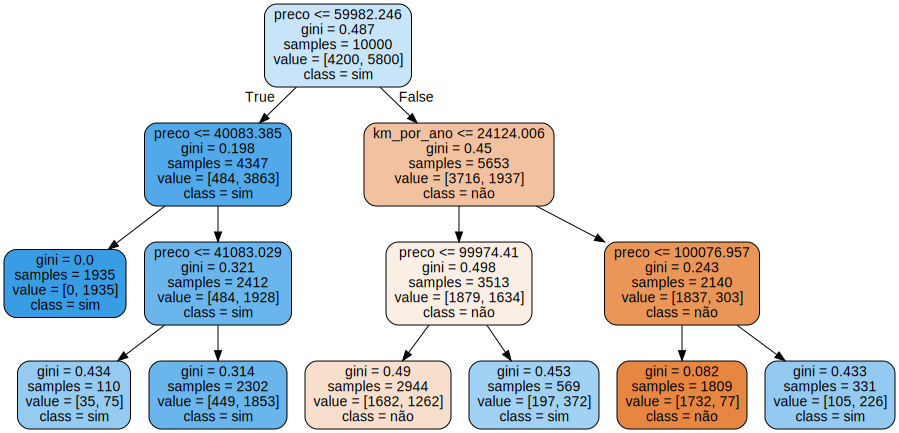

In [50]:
from sklearn.tree import export_graphviz
import graphviz


features = x_azar.columns
dot_data = export_graphviz(melhor, out_file=None, filled=True, rounded=True,
                          class_names=["não","sim"],
                          feature_names=features)
graph = graphviz.Source(dot_data)
graph

### Busca aleatória - RandomizedSearch

In [52]:
from sklearn.model_selection import RandomizedSearchCV, KFold

SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3, 5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "criterion": ["gini", "entropy"]

}

busca = RandomizedSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros,
                           n_iter=16,
                    cv = KFold(n_splits = 5, shuffle=True),
                    random_state=SEED)

busca.fit(x_azar, y_azar)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

D:\Anaconda3\envs\aluraenv\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\envs\aluraenv\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\envs\aluraenv\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\envs\aluraenv\lib\site-packages\skle

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009596,0.000490,0.001201,3.987164e-04,128,128,5,gini,"{'min_samples_split': 128, 'min_samples_leaf':...",0.784,...,0.7835,0.011278,13,0.788375,0.790500,0.784750,0.786,0.790625,0.788050,0.002359
1,0.006998,0.000001,0.001001,7.440188e-06,64,32,3,gini,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.784,...,0.7870,0.009618,1,0.788375,0.790125,0.783625,0.786,0.789500,0.787525,0.002405
2,0.007592,0.000490,0.001000,2.336015e-07,64,128,3,gini,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.784,...,0.7870,0.009618,1,0.788375,0.790125,0.783625,0.786,0.789500,0.787525,0.002405
3,0.013793,0.000744,0.001404,4.943028e-04,32,64,5,entropy,"{'min_samples_split': 32, 'min_samples_leaf': ...",0.784,...,0.7839,0.011825,7,0.788375,0.790500,0.785250,0.786,0.791625,0.788350,0.002469
4,0.013398,0.001021,0.001396,4.955404e-04,64,64,5,entropy,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.784,...,0.7839,0.011825,7,0.788375,0.790500,0.785250,0.786,0.791625,0.788350,0.002469


In [54]:
scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits=5, shuffle=True))
imprime_score(scores)

Accuracy médio 78.70
Intervalo [76.85, 80.55]


In [55]:
melhor = busca.best_estimator_
print(melhor)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=32, min_samples_split=64,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


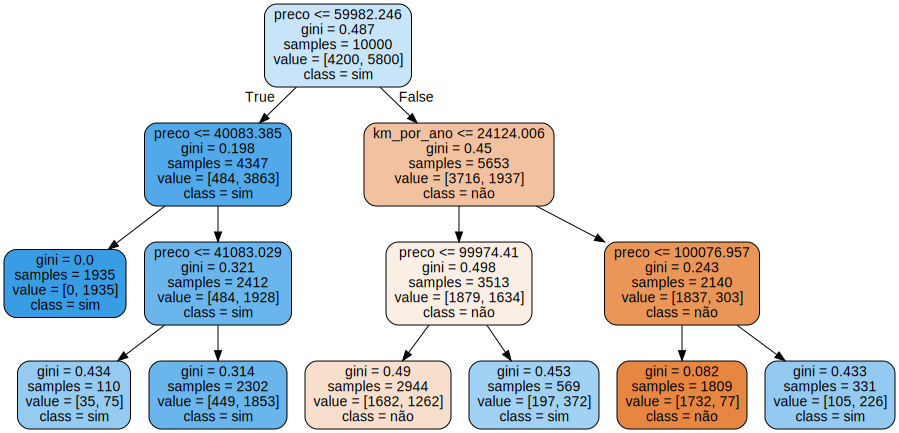

In [56]:
features = x_azar.columns
dot_data = export_graphviz(melhor, out_file=None, filled=True, rounded=True,
                        class_names=["não", "sim"],
                        feature_names = features)

graph = graphviz.Source(dot_data)
graph

### Customizando o espaço de hiperparâmetros

In [57]:
from scipy.stats import randint

SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3, 5, 10,15, 20, 30, None],
    "min_samples_split": randint(32,128),
    "min_samples_leaf": randint(32,128),
    "criterion": ["gini", "entropy"]

}

busca = RandomizedSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros,
                           n_iter=16,
                    cv = KFold(n_splits = 5, shuffle=True),
                    random_state=SEED)

busca.fit(x_azar, y_azar)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

D:\Anaconda3\envs\aluraenv\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\envs\aluraenv\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\envs\aluraenv\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\envs\aluraenv\lib\site-packages\skle

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010796,0.000408,0.000998,1.116756e-05,entropy,3,71,100,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.7840,...,0.7870,0.009618,1,0.788375,0.790125,0.783625,0.786000,0.789500,0.787525,0.002405
1,0.012795,0.000748,0.001600,4.897457e-04,gini,15,93,111,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.7740,...,0.7765,0.004393,14,0.797000,0.798625,0.789375,0.792125,0.795375,0.794500,0.003345
2,0.012196,0.000748,0.001600,4.899599e-04,gini,20,124,88,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.7705,...,0.7793,0.010221,8,0.793875,0.795500,0.787750,0.789000,0.791750,0.791575,0.002898
3,0.015794,0.001166,0.001197,4.013116e-04,gini,None,46,62,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.7575,...,0.7685,0.010378,16,0.804750,0.805875,0.796875,0.800875,0.803375,0.802350,0.003206
4,0.011996,0.000632,0.001000,4.909339e-07,gini,15,126,84,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.7705,...,0.7794,0.010413,7,0.793750,0.795250,0.787500,0.788875,0.791625,0.791400,0.002898


In [58]:
scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits=5, shuffle=True))
imprime_score(scores)

Accuracy médio 78.71
Intervalo [77.49, 79.93]


In [59]:
melhor = busca.best_estimator_
print(melhor)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=71, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [64]:
resultados_ordenados_pela_media = resultados.sort_values("mean_test_score", ascending=False)
for indice,linha in resultados_ordenados_pela_media.iterrows():
    print("%.3f +-(%.3f) %s" % (linha["mean_test_score"], linha["std_test_score"]*2, linha["params"]))
    

0.787 +-(0.019) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 71, 'min_samples_split': 100}
0.784 +-(0.024) {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 73, 'min_samples_split': 72}
0.784 +-(0.024) {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 67}
0.781 +-(0.017) {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 108, 'min_samples_split': 110}
0.780 +-(0.019) {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 125, 'min_samples_split': 59}
0.780 +-(0.012) {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 103, 'min_samples_split': 96}
0.779 +-(0.021) {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 126, 'min_samples_split': 84}
0.779 +-(0.020) {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 124, 'min_samples_split': 88}
0.779 +-(0.009) {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 101, 'min_samples_split': 52}
0.779 +-(0.014) {'criterion': 'entropy', 'max_depth

### Uma exploração mais a fundo de forma aleatória

In [67]:
from scipy.stats import randint

SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3, 5, 10,15, 20, 30, None],
    "min_samples_split": randint(32,128),
    "min_samples_leaf": randint(32,128),
    "criterion": ["gini", "entropy"]

}

busca = RandomizedSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros,
                           n_iter=64,
                    cv = KFold(n_splits = 5, shuffle=True),
                    random_state=SEED)

busca.fit(x_azar, y_azar)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

D:\Anaconda3\envs\aluraenv\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\envs\aluraenv\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\envs\aluraenv\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\envs\aluraenv\lib\site-packages\skle

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009995,0.000629,0.001400,0.000490,entropy,3,71,100,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.7840,...,0.7870,0.009618,1,0.788375,0.790125,0.783625,0.786000,0.789500,0.787525,0.002405
1,0.011799,0.000401,0.000800,0.000400,gini,15,93,111,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.7740,...,0.7765,0.004393,46,0.797000,0.798625,0.789375,0.792125,0.795375,0.794500,0.003345
2,0.010800,0.000751,0.000800,0.000400,gini,20,124,88,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.7705,...,0.7793,0.010221,27,0.793875,0.795500,0.787750,0.789000,0.791750,0.791575,0.002898
3,0.013793,0.000752,0.001203,0.000398,gini,None,46,62,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.7575,...,0.7685,0.010378,64,0.804750,0.805875,0.796875,0.800875,0.803375,0.802350,0.003206
4,0.010795,0.000748,0.000800,0.000400,gini,15,126,84,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.7705,...,0.7794,0.010413,26,0.793750,0.795250,0.787500,0.788875,0.791625,0.791400,0.002898


In [68]:
resultados_ordenados_pela_media = resultados.sort_values("mean_test_score", ascending=False)
for indice,linha in resultados_ordenados_pela_media.iterrows():
    print("%.3f +-(%.3f) %s" % (linha["mean_test_score"], linha["std_test_score"]*2, linha["params"]))

0.787 +-(0.019) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 71, 'min_samples_split': 100}
0.787 +-(0.019) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 69, 'min_samples_split': 124}
0.787 +-(0.019) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 63, 'min_samples_split': 88}
0.787 +-(0.019) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 67, 'min_samples_split': 76}
0.787 +-(0.019) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 65, 'min_samples_split': 50}
0.787 +-(0.019) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 120, 'min_samples_split': 46}
0.787 +-(0.019) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 53, 'min_samples_split': 111}
0.787 +-(0.019) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 106, 'min_samples_split': 108}
0.784 +-(0.024) {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 67}
0.784 +-(0.024) {'criterion': 'gini', 'max_depth': 5, '

In [69]:
scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits=5, shuffle=True))
imprime_score(scores)

Accuracy médio 78.66
Intervalo [76.79, 80.53]


## Comparando GridSearchCV() com RandomizedSearchCV() (1 comparação)

### GridSearchCV():

In [70]:
from sklearn.ensemble import RandomForestClassifier
import time
SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "n_estimators": [10,100],
    "bootstrap":[True,False],
    "max_depth" : [3, 5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "criterion": ["gini", "entropy"]

}
tic = time.time()
busca = GridSearchCV(RandomForestClassifier(),
                    espaco_de_parametros,
                    cv = KFold(n_splits = 5, shuffle=True))

busca.fit(x_azar, y_azar)
tac = time.time()
tempo_que_passou = tac - tic
print("Tempo %.2f segundos" % (tempo_que_passou))

resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

Tempo 157.19 segundos


D:\Anaconda3\envs\aluraenv\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\envs\aluraenv\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\envs\aluraenv\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\envs\aluraenv\lib\site-packages\skle

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.023391,0.004361,0.002802,0.000395,True,gini,3,32,32,10,...,0.7619,0.015357,130,0.775500,0.774500,0.729750,0.774000,0.742875,0.759325,0.019249
1,0.218329,0.007551,0.018396,0.001357,True,gini,3,32,32,100,...,0.7726,0.014685,93,0.777375,0.778750,0.770875,0.773375,0.779125,0.775900,0.003235
2,0.025194,0.001328,0.003399,0.000490,True,gini,3,32,64,10,...,0.7731,0.011373,89,0.782125,0.782250,0.760375,0.772625,0.768750,0.773225,0.008321
3,0.214135,0.008205,0.018394,0.001025,True,gini,3,32,64,100,...,0.7679,0.019356,119,0.763000,0.781375,0.771500,0.773375,0.779750,0.773800,0.006556
4,0.022989,0.001267,0.002999,0.000007,True,gini,3,32,128,10,...,0.7607,0.014250,135,0.775500,0.761375,0.729625,0.767250,0.777250,0.762200,0.017267


In [71]:
resultados_ordenados_pela_media = resultados.sort_values("mean_test_score", ascending=False)
for indice,linha in resultados_ordenados_pela_media[:5].iterrows():
    print("%.3f +-(%.3f) %s" % (linha["mean_test_score"], linha["std_test_score"]*2, linha["params"]))

0.780 +-(0.020) {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 64, 'n_estimators': 10}
0.778 +-(0.020) {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 128, 'n_estimators': 10}
0.778 +-(0.030) {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 64, 'n_estimators': 10}
0.778 +-(0.027) {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 64, 'n_estimators': 10}
0.778 +-(0.033) {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 64, 'n_estimators': 100}


In [72]:
tic = time.time()
scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits=5, shuffle=True))
tac = time.time()
tempo_que_passou = tac - tic
print("Tempo %.2f segundos" % (tempo_que_passou))

imprime_score(scores)
melhor = busca.best_estimator_
print(melhor)

Tempo 669.71 segundos
Accuracy médio 76.78
Intervalo [75.74, 77.82]
RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=32, min_samples_split=64,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


### RandomizedSearchCV():

In [76]:
SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "n_estimators": randint(10,101),
    "bootstrap":[True,False],
    "max_depth" : randint(3,6),
    "min_samples_split": randint(32,129),
    "min_samples_leaf": randint(32,129),
    "criterion": ["gini", "entropy"]

}
tic = time.time()
busca = RandomizedSearchCV(RandomForestClassifier(),
                    espaco_de_parametros,
                    n_iter = 80,
                    cv = KFold(n_splits = 5, shuffle=True))

busca.fit(x_azar, y_azar)
tac = time.time()
tempo_que_passou = tac - tic
print("Tempo %.2f segundos" % (tempo_que_passou))

resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

Tempo 78.57 segundos


D:\Anaconda3\envs\aluraenv\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\envs\aluraenv\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\envs\aluraenv\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\envs\aluraenv\lib\site-packages\skle

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.229728,0.005414,0.015591,0.000487,False,gini,3,50,93,89,...,0.7704,0.009744,75,0.777625,0.776125,0.761500,0.773625,0.780625,0.773900,0.006601
1,0.159750,0.003863,0.014993,0.001096,True,gini,3,88,104,80,...,0.7729,0.014277,63,0.777125,0.772875,0.771500,0.773375,0.779875,0.774950,0.003088
2,0.167749,0.008394,0.014792,0.001165,True,gini,3,126,84,77,...,0.7735,0.011781,59,0.773750,0.777500,0.771500,0.775875,0.780750,0.775875,0.003164
3,0.120756,0.005905,0.011396,0.000800,True,gini,3,57,73,50,...,0.7733,0.010429,60,0.777250,0.778000,0.764125,0.773625,0.780500,0.774700,0.005727
4,0.180749,0.009026,0.014189,0.000387,True,gini,4,52,88,68,...,0.7754,0.012220,28,0.777625,0.778250,0.771625,0.774625,0.780375,0.776500,0.003054


In [77]:
resultados_ordenados_pela_media = resultados.sort_values("mean_test_score", ascending=False)
for indice,linha in resultados_ordenados_pela_media[:5].iterrows():
    print("%.3f +-(%.3f) %s" % (linha["mean_test_score"], linha["std_test_score"]*2, linha["params"]))

0.779 +-(0.025) {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 84, 'min_samples_split': 89, 'n_estimators': 48}
0.778 +-(0.031) {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 96, 'n_estimators': 18}
0.778 +-(0.032) {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 121, 'min_samples_split': 47, 'n_estimators': 27}
0.777 +-(0.024) {'bootstrap': False, 'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 96, 'min_samples_split': 98, 'n_estimators': 11}
0.777 +-(0.029) {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 63, 'min_samples_split': 88, 'n_estimators': 69}


In [78]:
tic = time.time()
scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits=5, shuffle=True))
tac = time.time()
tempo_que_passou = tac - tic
print("Tempo %.2f segundos" % (tempo_que_passou))

imprime_score(scores)
melhor = busca.best_estimator_
print(melhor)

Tempo 338.98 segundos
Accuracy médio 77.24
Intervalo [75.49, 78.99]
RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=84,
            min_samples_split=89, min_weight_fraction_leaf=0.0,
            n_estimators=48, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)


### Caso eu não possa ou não consiga utilizar cross validation

In [80]:
from sklearn.model_selection import train_test_split

SEED=301
np.random.seed(SEED)

x_treino_teste, x_validacao, y_treino_teste, y_validacao = train_test_split(x_azar, y_azar, test_size=0.2, shuffle=True, stratify=y_azar)

print(x_treino_teste.shape)
print(x_validacao.shape)
print(y_treino_teste.shape)
print(y_validacao.shape)

(8000, 3)
(2000, 3)
(8000,)
(2000,)


In [81]:
from sklearn.model_selection import StratifiedShuffleSplit



SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "n_estimators" : randint(10, 101),
    "max_depth" : randint(3, 6),
    "min_samples_split": randint(32, 129),
    "min_samples_leaf": randint(32, 129),
    "bootstrap" : [True, False],
    "criterion": ["gini", "entropy"]

}

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.25)

tic = time.time()
busca = RandomizedSearchCV(RandomForestClassifier(),
                    espaco_de_parametros,
                    n_iter = 5,
                    cv = split)
busca.fit(x_treino_teste, y_treino_teste)
tac = time.time()
tempo_que_passou = tac - tic
print("Tempo %.2f segundos" % tempo_que_passou)



resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

Tempo 1.00 segundos


D:\Anaconda3\envs\aluraenv\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\envs\aluraenv\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\envs\aluraenv\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,mean_train_score,std_train_score
0,0.194937,0.0,0.016000,0.0,False,gini,3,50,93,89,"{'bootstrap': False, 'criterion': 'gini', 'max...",0.7745,0.7745,0.0,2,0.775500,0.775500,0.0
1,0.136968,0.0,0.013983,0.0,True,gini,3,88,104,80,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7735,0.7735,0.0,5,0.775333,0.775333,0.0
2,0.125971,0.0,0.012996,0.0,True,gini,3,126,84,77,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7745,0.7745,0.0,2,0.775333,0.775333,0.0
3,0.087972,0.0,0.008996,0.0,True,gini,3,57,73,50,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7750,0.7750,0.0,1,0.775167,0.775167,0.0
4,0.125972,0.0,0.013983,0.0,True,gini,4,52,88,68,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7745,0.7745,0.0,2,0.775000,0.775000,0.0


In [82]:
tic = time.time()
scores = cross_val_score(busca, x_validacao, y_validacao, cv = split)
tac = time.time()
tempo_passado = tac - tic
print("Tempo %.2f segundos" % tempo_passado)

scores

Tempo 0.37 segundos


array([0.754])